In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

In [2]:
X, y = load_breast_cancer().data,load_breast_cancer().target.reshape(-1,1)

In [3]:
y.shape

(569, 1)

In [11]:
class nn_sigmoid(object):
    def __init__(self, learning_rate =0.0005, iterations = 1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
    
    def fit(self,X,y):
        w_ = np.zeros((X.shape[1],1))
        b_ = 0.0
        m_ = X.shape[0]
        cost_ = []
        acc_ =[]
        i = 1
        while(i<self.iterations):
            z = np.dot(X,w_) + b_
            a = self.activation(z)
            cost = -(1/m_) * np.sum(y * np.log(a)+ (1-y)*np.log(1-a))
            dw = (1/m_)*np.dot(X.T,(a-y))
            db = (1/m_) * np.sum(a-y)
            w_ -= self.learning_rate * dw
            b_ -= self.learning_rate * db
            cost_.append(cost)
            acc = self.acc(y,np.where(a>0.5,1,0),m_)
            acc_.append(acc)
            i+=1
            if i % 50 ==0:
                print(f'{i} epoch: cost {cost} : acc {acc}')
        df = pd.DataFrame(cost_, columns=['cost'])
        df['acc'] = acc_
        df.plot(figsize = (14,5))
        plt.ylim(0,1);
        plt.title('Cost Function vs Epochs')
        return w_,b_,cost_
    
    def activation(self,z):
        return 1/(1+ np.exp(-z))
    
    def acc(self,y_true,y_pred,m):
        return np.sum(y_true == y_pred)/m

50 epoch: cost 0.6672029969510771 : acc 0.37258347978910367
100 epoch: cost 0.652884989737108 : acc 0.37258347978910367
150 epoch: cost 0.6399283256411157 : acc 0.43409490333919154
200 epoch: cost 0.6281179973222591 : acc 0.6239015817223199
250 epoch: cost 0.617280560570026 : acc 0.7346221441124781
300 epoch: cost 0.6072764558066747 : acc 0.8066783831282952
350 epoch: cost 0.5979928549692521 : acc 0.8541300527240774
400 epoch: cost 0.589337791997058 : acc 0.8787346221441125
450 epoch: cost 0.5812355877326096 : acc 0.8998242530755711
500 epoch: cost 0.5736233521104056 : acc 0.8998242530755711
550 epoch: cost 0.5664483213305465 : acc 0.9050966608084359
600 epoch: cost 0.5596658244259809 : acc 0.9086115992970123
650 epoch: cost 0.5532377201163444 : acc 0.9050966608084359
700 epoch: cost 0.5471311852038541 : acc 0.9033391915641477
750 epoch: cost 0.5413177670440382 : acc 0.8998242530755711
800 epoch: cost 0.5357726358033573 : acc 0.8980667838312829
850 epoch: cost 0.5304739890985473 : acc 

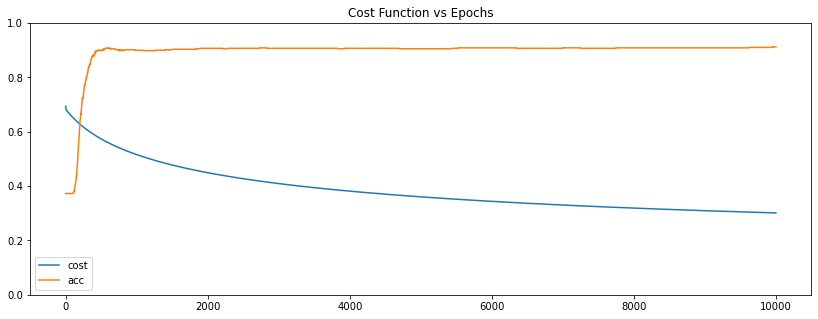

In [12]:
w_,b_,cost_ = nn_sigmoid(learning_rate =0.0000005, iterations = 10000).fit(X,y)